## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_1206-0207-2023.csv', firstRow=612, lastRow=618)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_130623_S613-618.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=474s; mass=44.60205g
This equals a volume of 44.691m; expected was 45.047mL; error is 0.789%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0017500000000000003 g/s and for 2nd derivative = 0.0005625000000000001 g/s^2


<IPython.core.display.Javascript object>


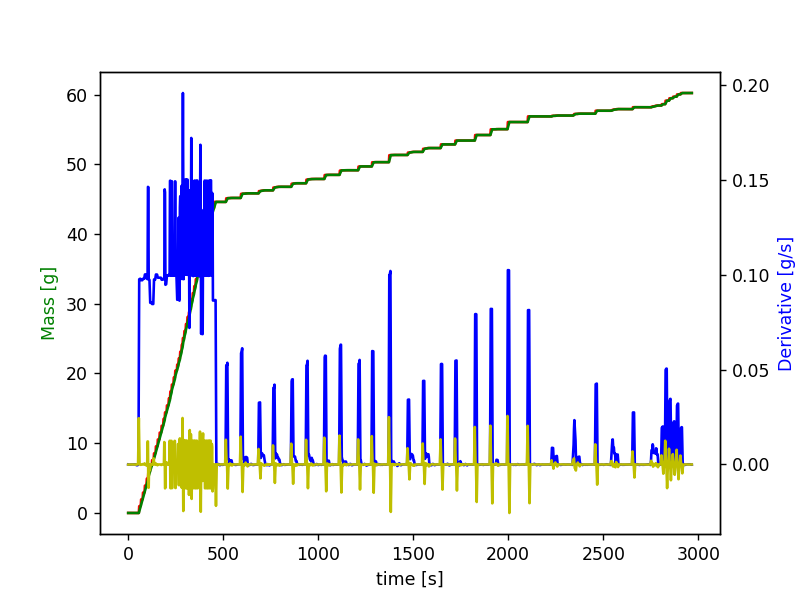

Addition of 0.573g Plantapon ACG 50 detected from 510s to 548s - expected volume = 0.545mL and actual volume = 0.508mL (resulting error is 6.835%)
Addition of 0.664g Plantapon ACG 50 detected from 588s to 632s - expected volume = 0.545mL and actual volume = 0.589mL (resulting error is 7.99%)
Addition of 0.435g Plantapon LC 7 detected from 682s to 722s - expected volume = 0.504mL and actual volume = 0.411mL (resulting error is 18.5%)
Addition of 0.514g Plantapon LC 7 detected from 758s to 802s - expected volume = 0.504mL and actual volume = 0.485mL (resulting error is 3.693%)
Addition of 0.509g Plantacare 2000 detected from 854s to 890s - expected volume = 0.55mL and actual volume = 0.468mL (resulting error is 14.862%)
Addition of 0.621g Plantacare 2000 detected from 932s to 976s - expected volume = 0.55mL and actual volume = 0.572mL (resulting error is 4.017%)
Addition of 0.593g Dehyton MC detected from 1028s to 1060s - expected volume = 0.588mL and actual volume = 0.547mL (resulting e

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.003125 g/s and for 2nd derivative = 0.000546875 g/s^2


<IPython.core.display.Javascript object>


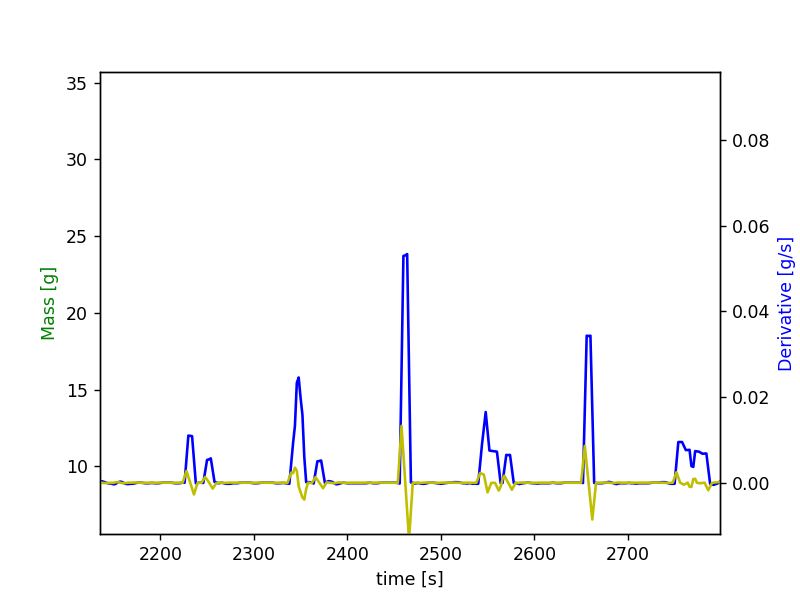

Addition of 0.131g Dehyquart CC6 detected from 2224s to 2262s - expected volume = 0.103mL and actual volume = 0.124mL (resulting error is 20.183%)
Addition of 0.274g Dehyquart CC6 detected from 2336s to 2380s - expected volume = 0.281mL and actual volume = 0.261mL (resulting error is 7.034%)
Addition of 0.424g Dehyquart CC6 detected from 2454s to 2472s - expected volume = 0.247mL and actual volume = 0.396mL (resulting error is 60.094%)
Addition of 0.239g Dehyquart CC6 detected from 2538s to 2582s - expected volume = 0.159mL and actual volume = 0.227mL (resulting error is 42.485%)
Addition of 0.274g Dehyquart CC6 detected from 2650s to 2668s - expected volume = 0.241mL and actual volume = 0.261mL (resulting error is 8.152%)
Addition of 0.246g Dehyquart CC6 detected from 2748s to 2792s - expected volume = 0.095mL and actual volume = 0.232mL (resulting error is 143.193%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


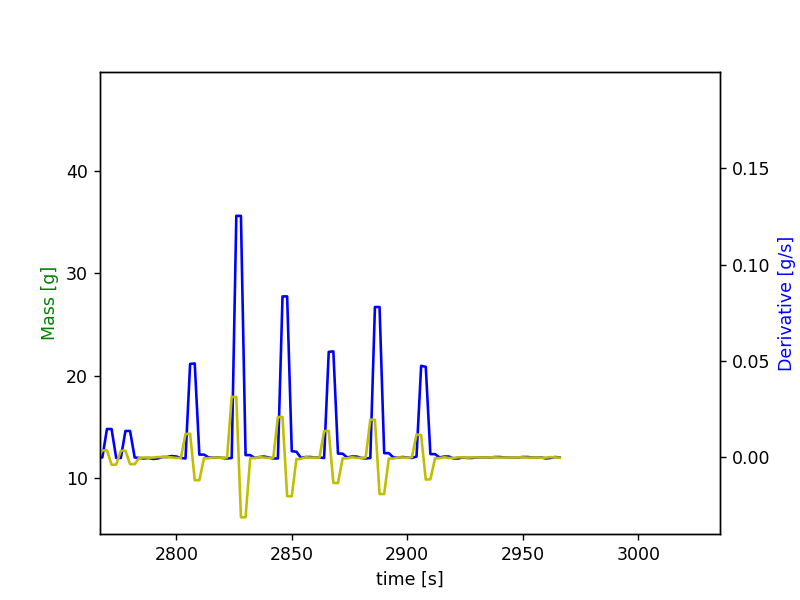

Addition of 0.2g Arlypon F detected from 2802s to 2814s - expected volume = 0.224mL and actual volume = 0.228mL (resulting error is 2.041%)
Addition of 0.504g Arlypon F detected from 2822s to 2834s - expected volume = 0.557mL and actual volume = 0.576mL (resulting error is 3.388%)
Addition of 0.344g Arlypon F detected from 2842s to 2854s - expected volume = 0.362mL and actual volume = 0.386mL (resulting error is 6.832%)
Addition of 0.227g Arlypon F detected from 2862s to 2874s - expected volume = 0.236mL and actual volume = 0.259mL (resulting error is 9.662%)
Addition of 0.319g Arlypon F detected from 2882s to 2894s - expected volume = 0.343mL and actual volume = 0.366mL (resulting error is 6.689%)
Addition of 0.197g Arlypon F detected from 2902s to 2914s - expected volume = 0.203mL and actual volume = 0.223mL (resulting error is 9.777%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2600,2616,2636,2656,2676,2884,2906])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_130623_S613-S618.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_29296\2651927144.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
612,613.0,0.0,0.000000,0.000000,0.0,0.000000,12.297149,0.000000,0.000000,0.000000,7.851538,0.0,0.000000,0.0,1.295895,0.0,0.0,1.978465,0.0
613,614.0,0.0,0.000000,0.000000,0.0,11.411244,0.000000,0.000000,10.059301,0.000000,0.000000,0.0,0.000000,0.0,2.769009,0.0,0.0,5.083668,0.0
614,615.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.269389,0.0,7.969468,0.0,4.158218,0.0,0.0,3.371660,0.0
615,616.0,0.0,0.000000,9.396591,0.0,0.000000,0.000000,11.535241,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.371188,0.0,0.0,2.248604,0.0
616,617.0,0.0,12.080287,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.026022,0.0,0.000000,0.0,2.674111,0.0,0.0,3.117556,0.0
617,618.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.937505,0.000000,10.570157,0.000000,0.0,0.000000,0.0,2.390695,0.0,0.0,1.912556,0.0
